<a href="https://colab.research.google.com/github/aarushi-agarwal/ML_music_recommender/blob/main/music_recommender_data_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = '/content/drive/Shareddrives/Machine_Learning_Project_Drive/'



Mounted at /content/drive


Code to download all the songs from Youtube:

In [ ]:
#!pip install yt-dlp
import yt_dlp
import os

def download_audio_from_youtube_playlist(playlist_url, genre, output_base_folder="Downloaded_Audio"):
    # Ensure the base output folder exists
    if not os.path.exists(output_base_folder):
        os.makedirs(output_base_folder)

    # Create a subfolder for each genre within the base folder
    output_folder = os.path.join(output_base_folder, genre)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # yt-dlp options for downloading audio
    ydl_opts = {
        'format': 'bestaudio/best',  # Best available audio-only format
        'outtmpl': f'{output_folder}/%(title)s.%(ext)s',  # Save file naming template
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',  # Convert audio to WAV format
            'preferredquality': '192',  # Optional: Set audio quality (doesn't affect WAV as much)
        }],
        'ignoreerrors': True,  # Skip videos with errors
        'retries': 3,  # Retry up to 3 times in case of intermittent errors
    }

    # Download the playlist
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        try:
            print(f"Downloading playlist from URL: {playlist_url}")
            ydl.download([playlist_url])
            print(f"Download complete for playlist: {playlist_url}")
        except yt_dlp.DownloadError as e:
            print(f"An error occurred: {e}")
            print("Some videos in the playlist may be unavailable or restricted.")

# List of playlist URLs with corresponding genres
playlists = [
    {"url": "https://www.youtube.com/playlist?list=PLFjmckBbDlzSE47xD0FivigDOARiLJl61", "genre": "Blues"},
    {"url": "https://www.youtube.com/playlist?list=PL2788304DC59DBEB4", "genre": "Classical"},
    {"url": "https://www.youtube.com/playlist?list=PL3oW2tjiIxvQW6c-4Iry8Bpp3QId40S5S", "genre": "Country"},
    {"url": "https://www.youtube.com/playlist?list=PL-Ib9oOPR7OHKLBFVkiq0F0rppCZ7YFLp", "genre": "Jazz"},
    {"url": "https://www.youtube.com/playlist?list=PLmXxqSJJq-yUwqtbp8MHBoTDoDULMoViq", "genre": "Metal"},
    {"url": "https://www.youtube.com/playlist?list=PLxA687tYuMWhkqYjvAGtW_heiEL4Hk_Lx", "genre": "Pop"},
    {"url": "https://www.youtube.com/playlist?list=PLEXox2R2RxZKUmrWKNF61K-kZSov14Snr", "genre": "Disco"},
    {"url": "https://youtube.com/playlist?list=PLvuMfxvpAQrkzez9insKS8cGPU74sK1Ss&si=xKGfXOnrRSZ9CGiG", "genre": "Hip-Hop"},
    {"url": "https://youtube.com/playlist?list=PLw7aLrPJ8Hl24kczxvRoPECfTvAMsOwv1&si=Xt0CIMq-JXp3rLpQ", "genre": "Reggae"},
    {"url": "https://youtube.com/playlist?list=PLVQ7g3e6O27cH8KG9mktLWH8zcqiwTntP&si=u40PwF1n7IGzaQZj", "genre": "Rock"},
    {"url": "https://youtube.com/playlist?list=PLBD52290539D96397&si=pHtbrcvxXbOHGZAc", "genre": "Rap"},
    {"url": "https://youtube.com/playlist?list=PL2z0emdmB6sCiM865_tVZIv8Ut_9mxqaq&si=4ZOlLO4w_JzZcvw4", "genre": "K-Pop"},
    {"url": "https://youtube.com/playlist?list=PL5PiyRsNH6iolTZhrMmOxfdQocnokwdpX&si=z6n3stJkKrv7TYpX", "genre": "Alternative"},
    ]

# Specify the base folder to save all downloaded playlists
output_base_folder = "/content/drive/Shareddrives/Machine_Learning_Project_Drive/Youtube_Data"

# Loop through each playlist and genre
for playlist in playlists:
    download_audio_from_youtube_playlist(playlist["url"], playlist["genre"], output_base_folder)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 51.8 MB/s eta 0:00:00


In [ ]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
import os
general_path = "/content/drive/Shareddrives/Machine_Learning_Project_Drive/Youtube_Data"
# print(list(os.listdir(f'{general_path}')))

# Importing 2 files
y, sr = librosa.load(f'{general_path}/Classical/Bach - Air - Best-of Classical Music.wav')
z, sr2 = librosa.load(f'{general_path}/Rock/AC⧸DC - Highway to Hell.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 7904768/22050)

print('z:', z, '\n')
print('z shape:', np.shape(z), '\n')
print('Sample Rate (KHz):', sr2, '\n')

# Verify length of the audio
print('Check Len of Audio:', 4601857/22050)

y: [0. 0. 0. ... 0. 0. 0.] 

y shape: (7904768,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 358.4928798185941
z: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9163097e-05
 -3.3244422e-05  0.0000000e+00] 

z shape: (4601857,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 208.70099773242632


Audio File: [ 2.0516214e-05  1.0675902e-05  2.2409178e-05 ... -9.1552844e-05
 -9.1552618e-05 -9.1552865e-05] 

Audio File shape: (7824384,)


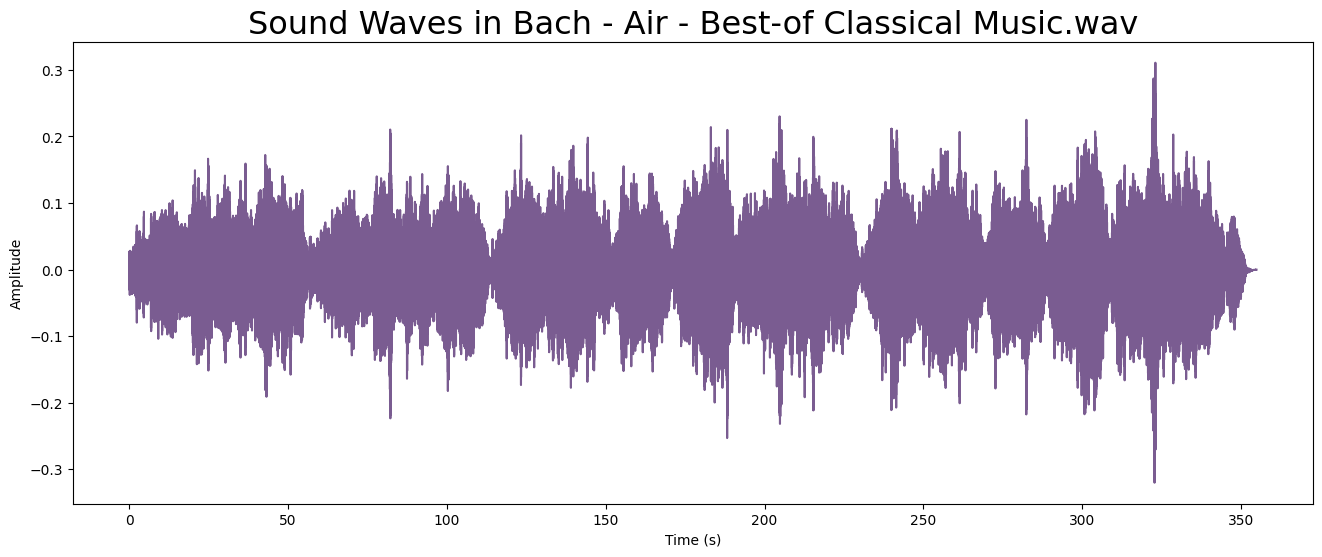

In [ ]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))


# Create the waveform plot with matplotlib
plt.figure(figsize=(16, 6))
plt.plot(np.linspace(0, len(audio_file) / sr, num=len(audio_file)), audio_file, color="#7A5C91")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sound Waves in Bach - Air - Best-of Classical Music.wav", fontsize=23)
plt.show()

Audio File: [-5.3336494e-06 -2.5253839e-06  1.9040680e-06 ... -3.0537514e-05
 -3.0548286e-05 -3.0405774e-05] 

Audio File shape: (4587520,)


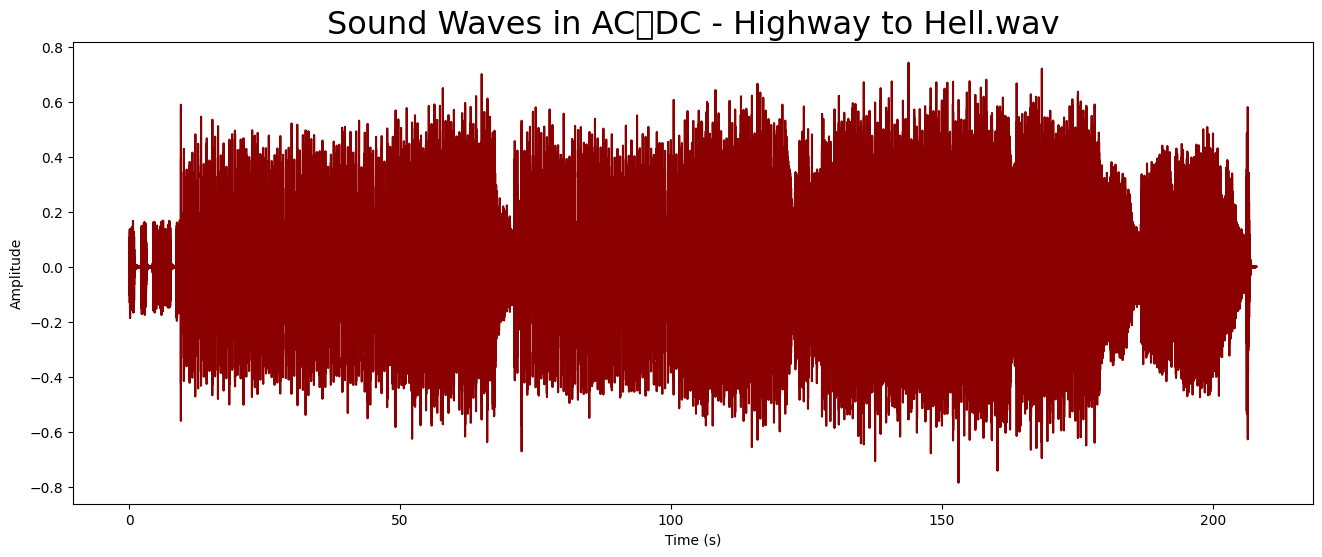

In [ ]:
audio_file_2, _ = librosa.effects.trim(z)

# the result is an numpy ndarray
print('Audio File:', audio_file_2, '\n')
print('Audio File shape:', np.shape(audio_file_2))


# Create the waveform plot with matplotlib
plt.figure(figsize=(16, 6))
plt.plot(np.linspace(0, len(audio_file_2) / sr2, num=len(audio_file_2)), audio_file_2, color="#8B0000")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sound Waves in AC⧸DC - Highway to Hell.wav", fontsize=23)
plt.show()

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns
# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object 1:', np.shape(D))

#for audio 2:
D_2 = np.abs(librosa.stft(audio_file_2, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object 1:', np.shape(D_2))





Shape of D object 1: (1025, 15283)
Shape of D object 1: (1025, 8961)


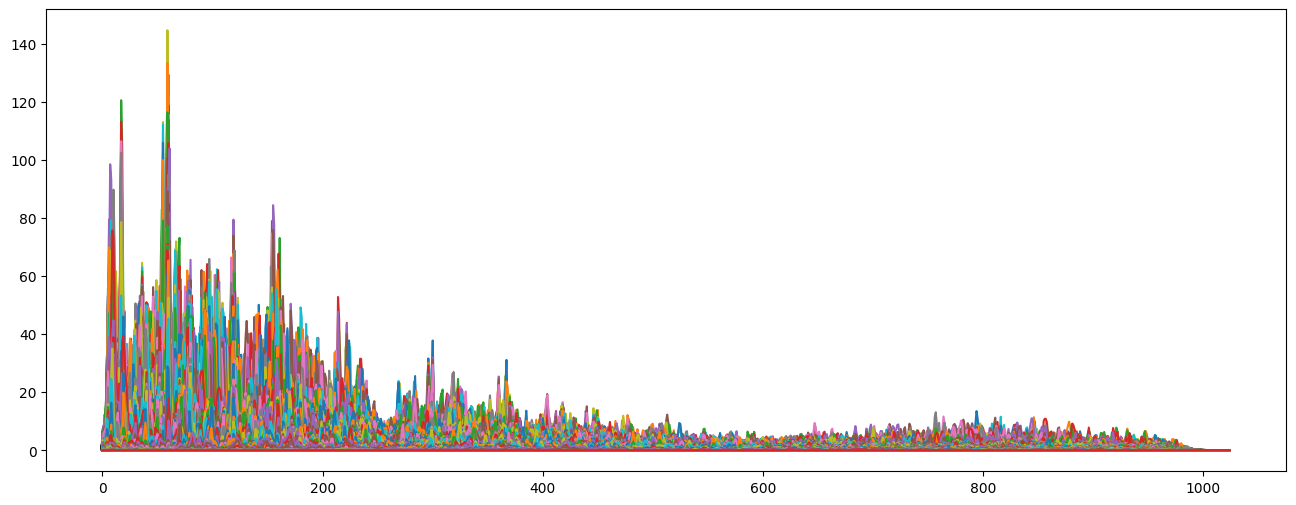

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(D);

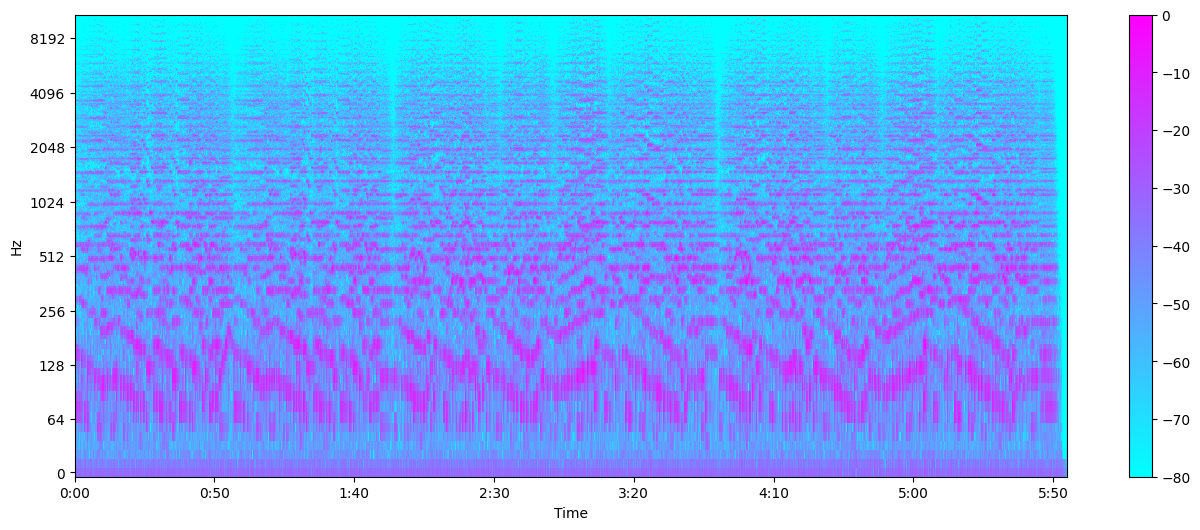

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB1 = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB1, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

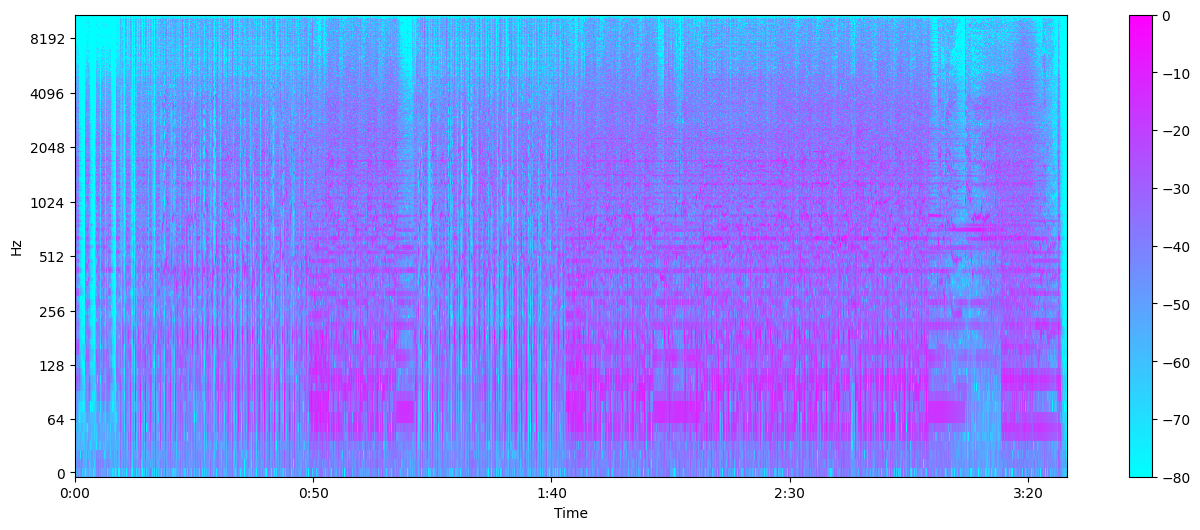

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB2 = librosa.amplitude_to_db(D_2, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB2, sr = sr2, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

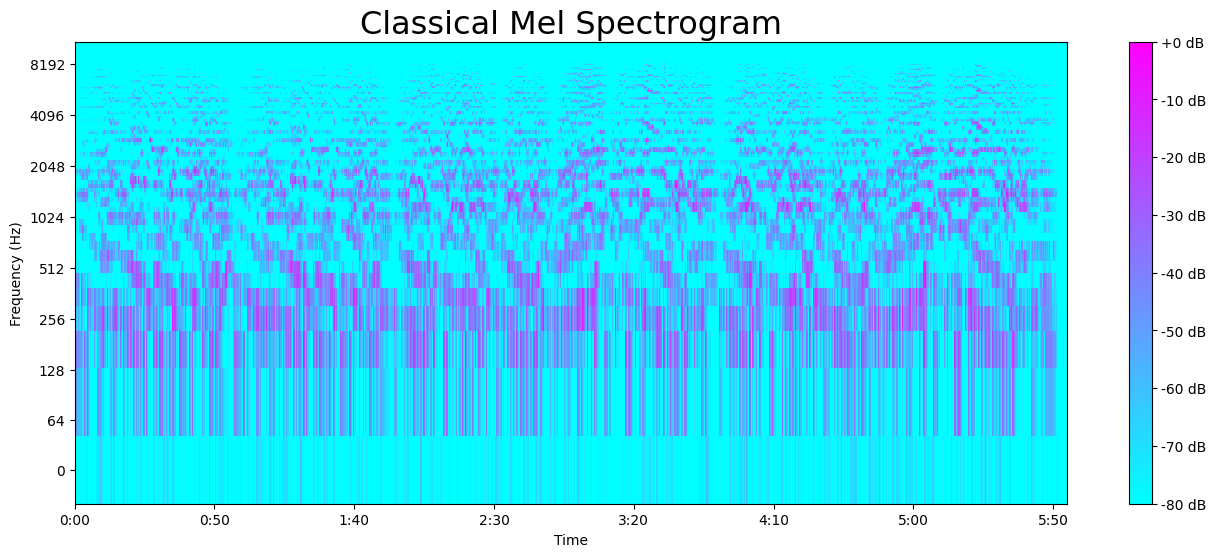

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load and trim the audio file
y, sr = librosa.load(f'{general_path}/Classical/Bach - Air - Best-of Classical Music.wav')
y, _ = librosa.effects.trim(y)

# Generate the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar(format='%+2.0f dB')
plt.title("Classical Mel Spectrogram", fontsize=23)
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
plt.show()


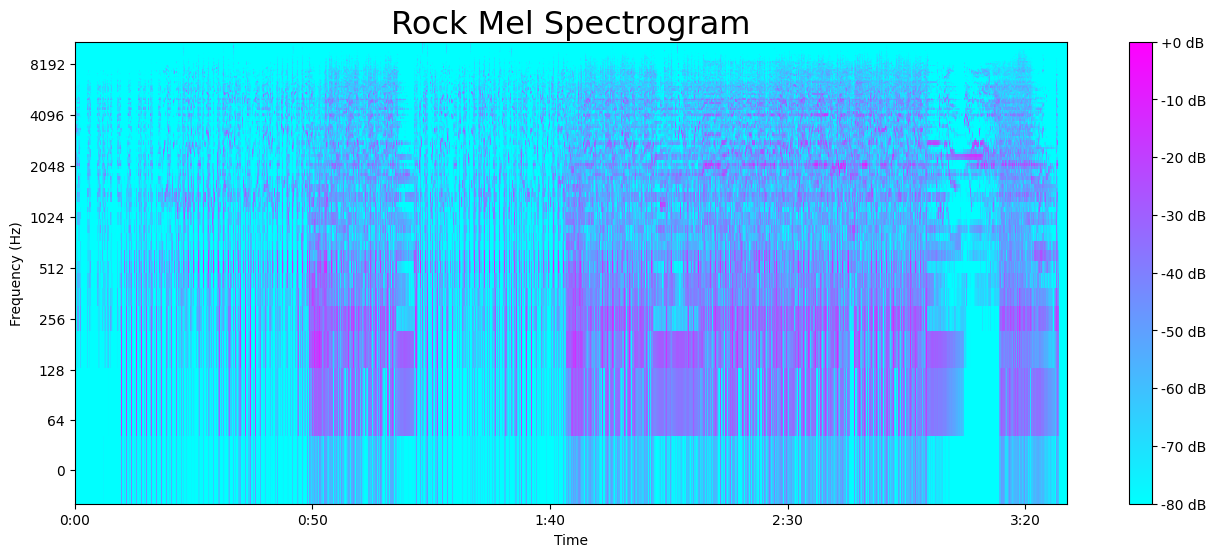

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


# Generate the Mel spectrogram
S = librosa.feature.melspectrogram(y=z, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr2, hop_length=512, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar(format='%+2.0f dB')
plt.title("Rock Mel Spectrogram", fontsize=23)
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
plt.show()

In [ ]:
zero_crossings_1 = librosa.zero_crossings(audio_file, pad=False)
print("Classical: ")
print(sum(zero_crossings_1))

print("Rock: ")
zero_crossings_2 = librosa.zero_crossings(audio_file_2, pad=False)
print(sum(zero_crossings_2))

Classical: 
667387
Rock: 
684122


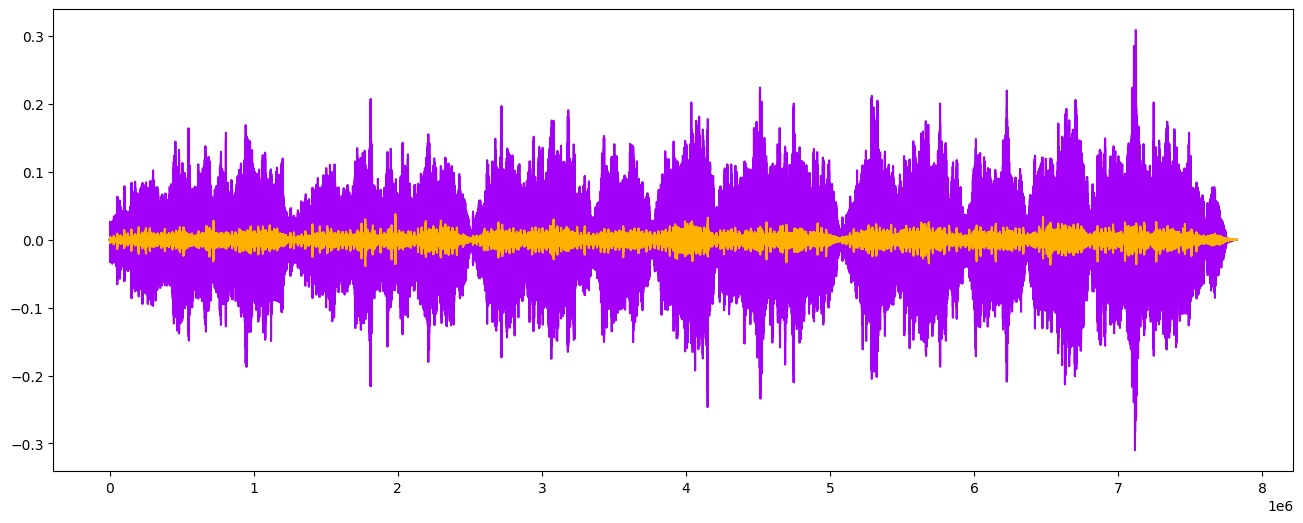

In [ ]:
#Harmonics and Perceptrual
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

In [ ]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

TypeError: spectral_centroid() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given

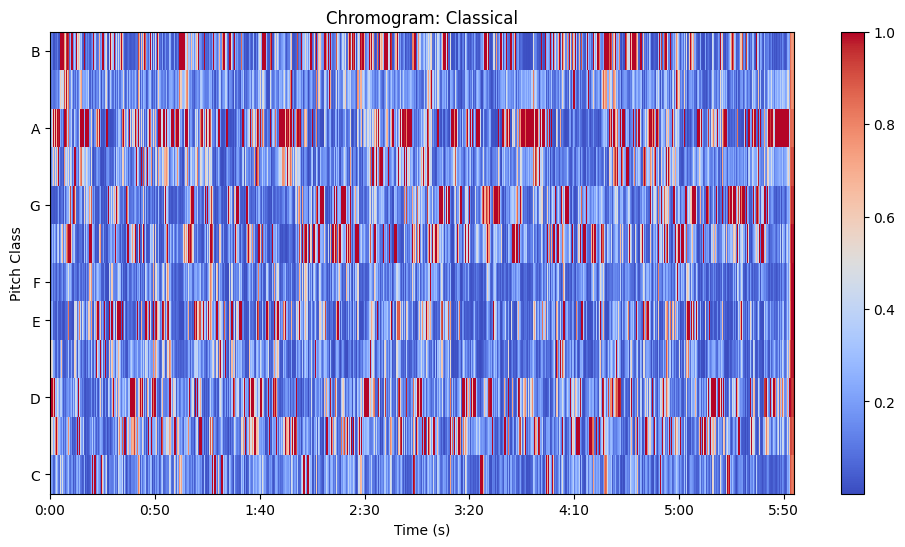

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Compute the chromagram
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot the chromagram
plt.figure(figsize=(12, 6))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chromogram: Classical')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')
plt.show()


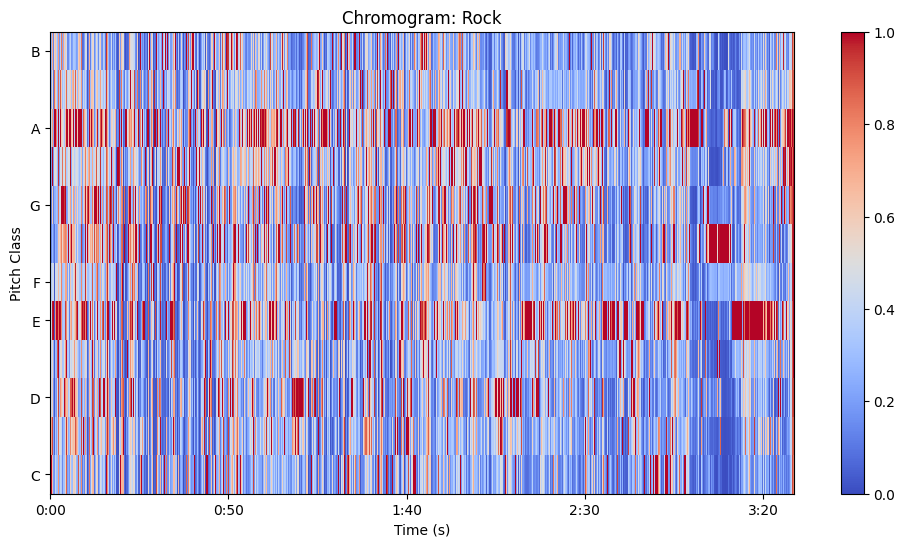

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Compute the chromagram
chroma = librosa.feature.chroma_stft(y=z, sr=sr2)

# Plot the chromagram
plt.figure(figsize=(12, 6))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chromogram: Rock')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')
plt.show()


CSV File Code

Code to download the features

In [ ]:
import librosa
import pandas as pd
import os

def extract_features(file_list):
    """
    Extracts audio features from a list of audio files.

    Parameters:
    file_list (list): List of file paths to audio files.

    Returns:
    List of dictionaries, where each dictionary contains features for one audio file.
    """
    features_list = []
    for i, file_name in enumerate(file_list, 1):
        try:
            print(f"Processing file {i}/{len(file_list)}: {file_name}")
            audio, sample_rate = librosa.load(file_name, sr=None)
            audio, _ = librosa.effects.trim(audio)

            # Extracting features
            chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
            rms = librosa.feature.rms(y=audio)
            spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)
            spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)
            mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=15)
            zero_crossings = librosa.zero_crossings(audio, pad=False)
            #y_harm, y_perc = librosa.effects.hpss(audio)
            tempo, _ = librosa.beat.beat_track(y=audio, sr=sample_rate)
            spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)

            features = {
                'song_name': os.path.basename(file_name),
                'genre': file_name.split('/')[-2],
                'length': len(audio),
                'tempo': tempo,
                'sample_rate': sample_rate,
                'zero_crossing_rate_mean': sum(zero_crossings) / len(zero_crossings),
                'chroma_stft_mean': chroma_stft.mean(),
                'chroma_stft_var': chroma_stft.var(),
                'rms_mean': rms.mean(),
                'rms_var': rms.var(),
                'spectral_centroid_mean': spectral_centroid.mean(),
                'spectral_centroid_var': spectral_centroid.var(),
                'spectral_bandwidth_mean': spectral_bandwidth.mean(),
                'spectral_bandwidth_var': spectral_bandwidth.var(),
                'spectral_rolloff_mean': spectral_rolloff.mean(),
                #'y_harm_mean': y_harm.mean(),
                #'y_perc_mean': y_perc.mean(),
            }

            for i in range(1, 16):
                features[f'mfcc{i}_mean'] = mfccs[i-1].mean()
                features[f'mfcc{i}_var'] = mfccs[i-1].var()

            features_list.append(features)

        except Exception as e:
            print(f"Error encountered while processing file: {file_name} - {e}")
            continue

    return features_list

def save_features_to_csv(features_list, output_csv):
    """
    Saves a list of features to a CSV file.

    Parameters:
    features_list (list): List of dictionaries containing features for each audio file.
    output_csv (str): Path to save the output CSV file.
    """
    df = pd.DataFrame(features_list)
    df.to_csv(output_csv, index=False)
    print(f"Features saved to {output_csv}")

# Specify the path and genres
audio_files = []
general_path = "/content/drive/Shareddrives/Machine_Learning_Project_Drive/Youtube_Data"
#included_genres = ["Rock"]

for genre in os.listdir(general_path):
    if genre == ".ipynb_checkpoints": #or genre not in included_genres:
        continue
    for song in os.listdir(f'{general_path}/{genre}'):
        audio_files.append(f'{general_path}/{genre}/{song}')

# Call the two functions separately
# Step 1: Extract features
features_list = extract_features(audio_files)

# Step 2: Save to CSV
output_csv = '/content/drive/Shareddrives/Machine_Learning_Project_Drive/Audio_Features/all_audio_features.csv'
save_features_to_csv(features_list, output_csv)


Processing file 1/156: /content/drive/Shareddrives/Machine_Learning_Project_Drive/Youtube_Data/Rock/Stevie Ray Vaughan - Texas Flood (Exclusive Video).wav
Processing file 2/156: /content/drive/Shareddrives/Machine_Learning_Project_Drive/Youtube_Data/Rock/Fleetwood Mac - The Chain [Studio Version].wav
Processing file 3/156: /content/drive/Shareddrives/Machine_Learning_Project_Drive/Youtube_Data/Rock/AC⧸DC - Highway to Hell.wav
Processing file 4/156: /content/drive/Shareddrives/Machine_Learning_Project_Drive/Youtube_Data/Rock/KISS - I Was Made For Loving You.wav
Processing file 5/156: /content/drive/Shareddrives/Machine_Learning_Project_Drive/Youtube_Data/Rock/Eric Burdon & The Animals- Good Times.wav
Processing file 6/156: /content/drive/Shareddrives/Machine_Learning_Project_Drive/Youtube_Data/Rock/David Dundas - Jeans on.wav
Processing file 7/156: /content/drive/Shareddrives/Machine_Learning_Project_Drive/Youtube_Data/Rock/Beds Are Burning - Midnight Oil.wav
Processing file 8/156: /con

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import os

# Folder containing the CSV files
folder_path = "/content/drive/Shareddrives/Machine_Learning_Project_Drive/Audio_Features"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read each CSV and concatenate into a single DataFrame
combined_df = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("/content/drive/Shareddrives/Machine_Learning_Project_Drive/Audio_Features/all_audio_features.csv", index=False)


EDA

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/Machine_Learning_Project_Drive/Audio_Features/all_audio_features.csv')

In [ ]:
data.shape

(3711, 45)

In [ ]:
#fixing format
# data = pd.read_csv('/content/drive/Shareddrives/Machine_Learning_Project_Drive/Audio_Features/all_audio_features.csv')
# data['tempo'] = [float(x.strip('[]')) for x in data['tempo']]
# data.to_csv('/content/drive/Shareddrives/Machine_Learning_Project_Drive/Audio_Features/all_audio_features_modified.csv', index=False)


<Axes: >

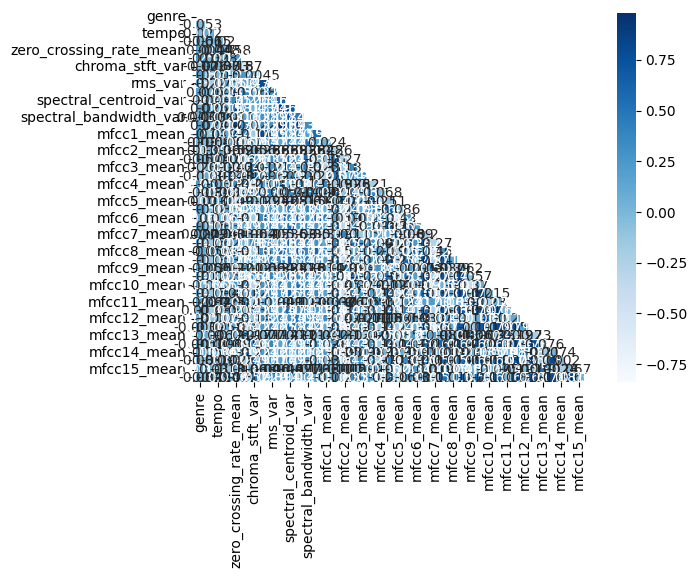

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['genre'] = le.fit_transform(data['genre'])

matrix = data.drop('song_name', axis = 1).corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

# plotting correlation matrix
sns.heatmap(matrix, cmap="Blues", annot=True, mask=mask)

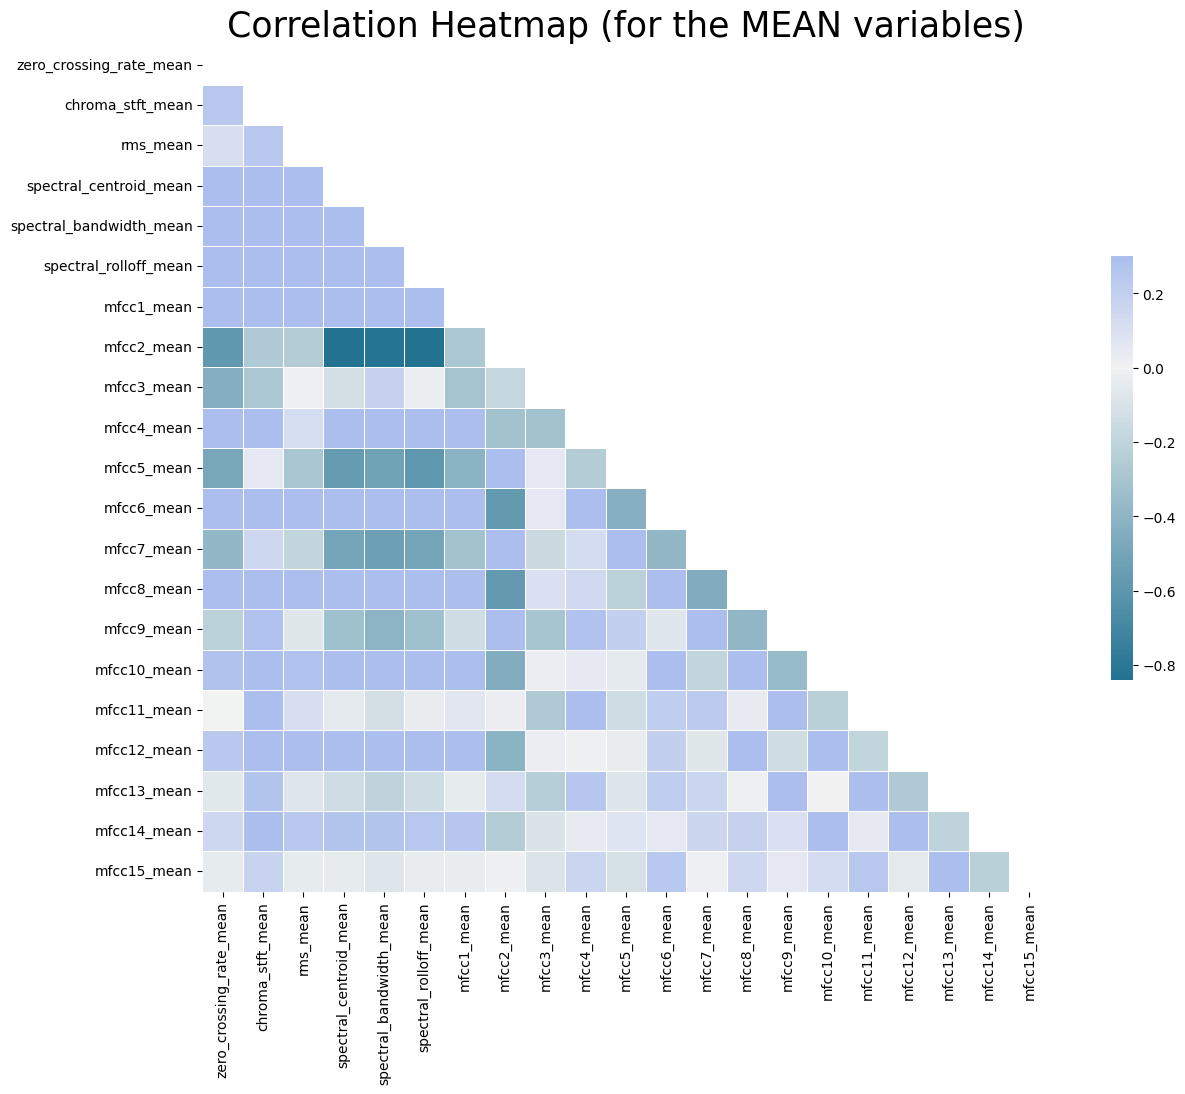

In [ ]:
import seaborn as sns
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 260, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

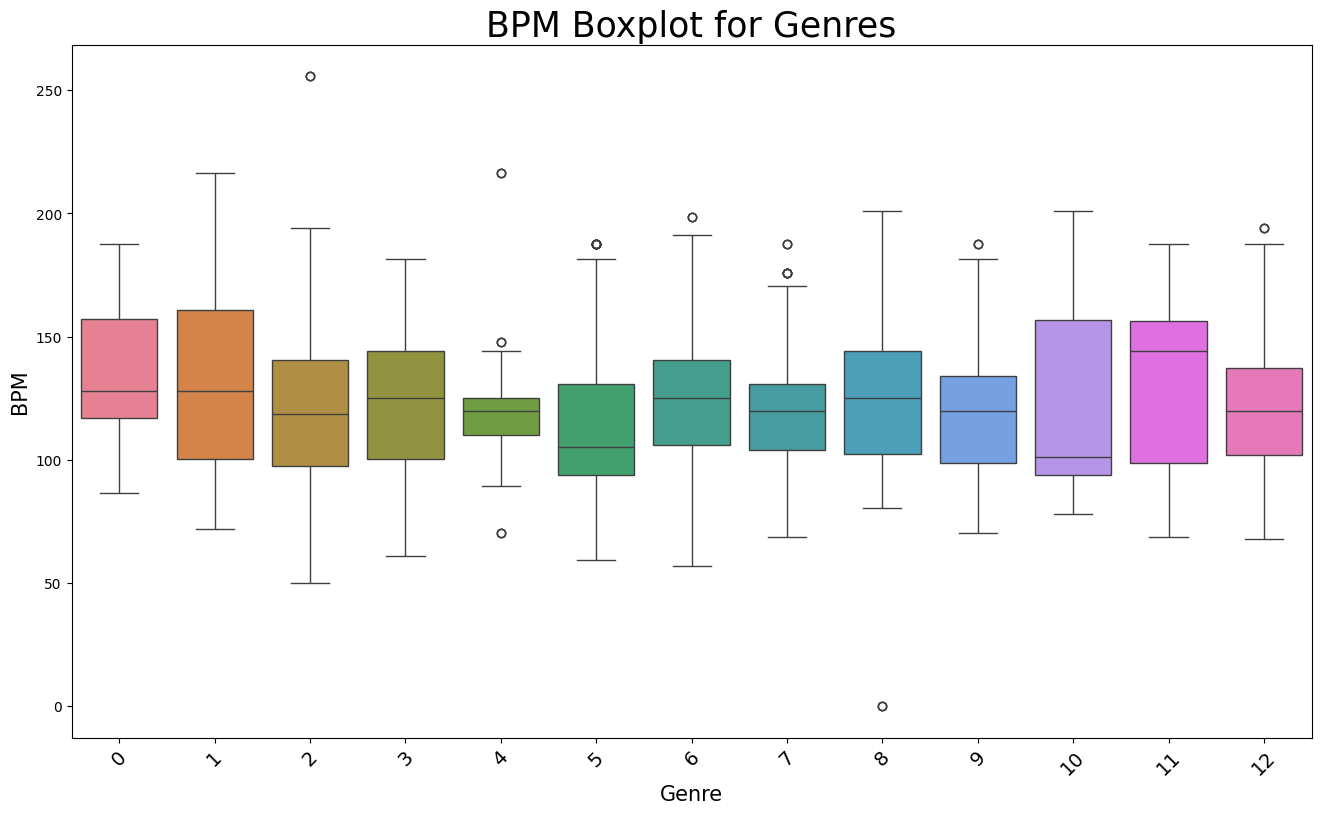

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
f, ax = plt.subplots(figsize=(16, 9))

# Generate the boxplot for tempo by genre
sns.boxplot(x="genre", y="tempo", data=data, palette='husl')

# Add title and labels
plt.title('BPM Boxplot for Genres', fontsize=25)
plt.xticks(fontsize=14, rotation=45)  # Rotating x-ticks for better readability
plt.yticks(fontsize=10)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)

# Save the plot to a file
plt.savefig("BPM Boxplot.jpg")

# Show the plot
plt.show()


In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/Machine_Learning_Project_Drive/Audio_Features/all_audio_features.csv')
data.columns

Index(['song_name', 'genre', 'length', 'tempo', 'sample_rate',
       'zero_crossing_rate_mean', 'chroma_stft_mean', 'chroma_stft_var',
       'rms_mean', 'rms_var', 'spectral_centroid_mean',
       'spectral_centroid_var', 'spectral_bandwidth_mean',
       'spectral_bandwidth_var', 'spectral_rolloff_mean', 'mfcc1_mean',
       'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var',
       'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean',
       'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
       'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean',
       'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var',
       'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

# Dropping the first column (assumed to be non-feature column) and setting up X and y
data = data.iloc[:, 1:]  # Adjust this line if needed based on your actual data structure
y = data['genre']
X = data.drop(columns=['genre'])

# Check for non-numeric columns in X
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns found and removed:", non_numeric_cols)
    X = X.drop(columns=non_numeric_cols)  # Drop non-numeric columns

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=cols)

#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

# Concatenate with target label
finalDf = pd.concat([principalDf, y.reset_index(drop=True)], axis=1)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"PCA explained variance ratio: {explained_variance}")
print(f"Total explained variance by 4 components: {explained_variance.sum() * 100:.2f}%")


Non-numeric columns found and removed: Index(['tempo'], dtype='object')
PCA explained variance ratio: [0.272515   0.12864016 0.10252331 0.07899381]
Total explained variance by 4 components: 58.27%


In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

# Dropping the first column (assumed to be non-feature column) and setting up X and y
data = data.iloc[:, 1:]  # Adjust this line if needed based on your actual data structure
y = data['genre']
X = data.drop(columns=['genre'])

# Check for non-numeric columns in X
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns found and removed:", non_numeric_cols)
    X = X.drop(columns=non_numeric_cols)  # Drop non-numeric columns

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=cols)

#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate with target label
finalDf = pd.concat([principalDf, y.reset_index(drop=True)], axis=1)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"PCA explained variance ratio: {explained_variance}")
print(f"Total explained variance by 2 components: {explained_variance.sum() * 100:.2f}%")


KeyError: 'genre'

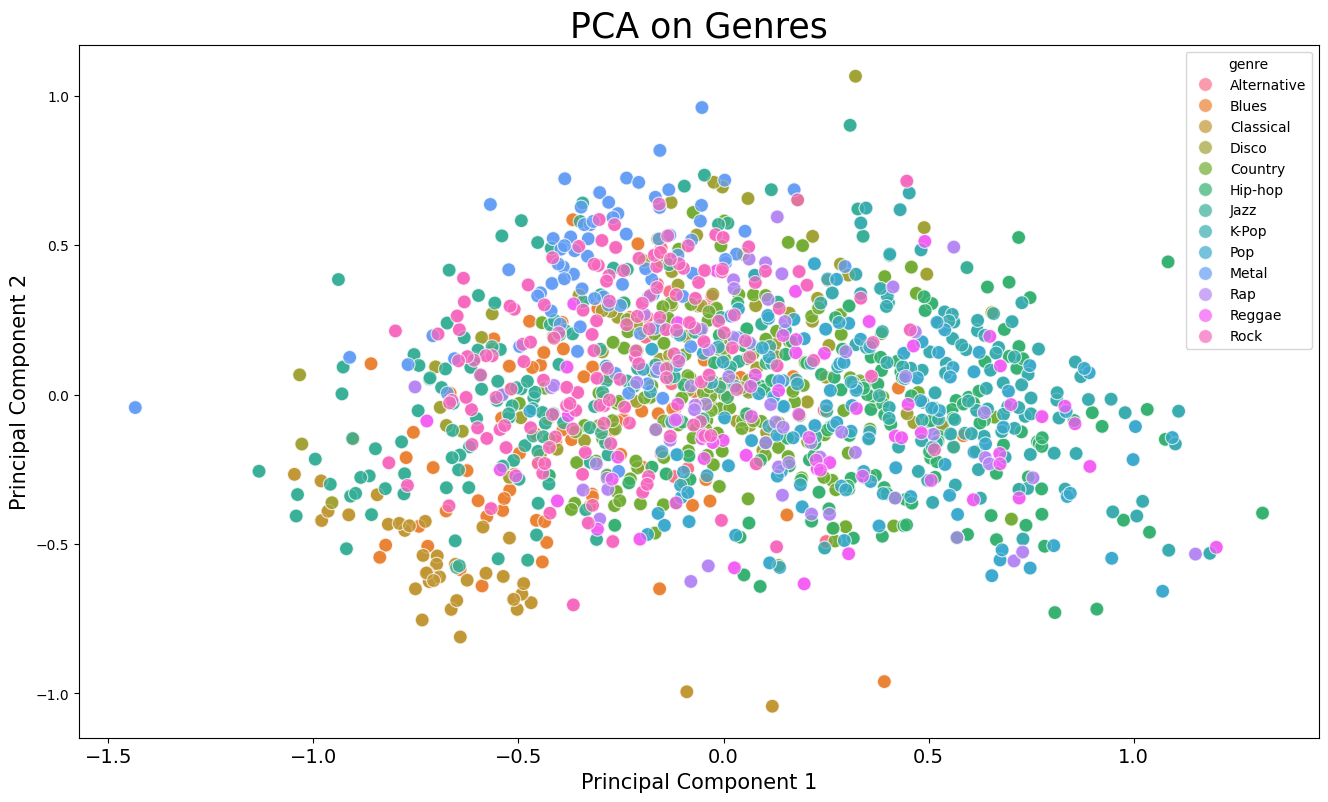

In [ ]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "genre", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

Genre classification using various different models:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/Machine_Learning_Project_Drive/Audio_Features/all_audio_features_modified.csv')
data.columns

Index(['song_name', 'genre', 'length', 'tempo', 'sample_rate',
       'zero_crossing_rate_mean', 'chroma_stft_mean', 'chroma_stft_var',
       'rms_mean', 'rms_var', 'spectral_centroid_mean',
       'spectral_centroid_var', 'spectral_bandwidth_mean',
       'spectral_bandwidth_var', 'spectral_rolloff_mean', 'mfcc1_mean',
       'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var',
       'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean',
       'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
       'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean',
       'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var',
       'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var'],
      dtype='object')

In [ ]:
y = data['genre'] # genre variable.
X = data.drop(columns=['genre', 'song_name']) #select all columns but not the labels

# Encode the genre labels as numeric values
label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'y_encoded' now contains numeric labels

# Normalize the feature matrix X
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)



In [ ]:
# Define the model_assess function
def model_assess(model, model_name):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the test data
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy {model_name}: {accuracy:.5f}")

In [ ]:
# Model evaluations

# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decision Trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decision Trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs')
model_assess(lg, "Logistic Regression")

# Neural Networks
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective='multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes: 0.51682
Accuracy Stochastic Gradient Descent: 0.62180
Accuracy KNN: 0.56124
Accuracy Decision Trees: 0.95155
Accuracy Random Forest: 0.94616
Accuracy Support Vector Machine: 0.72005
Accuracy Logistic Regression: 0.64065
Accuracy Neural Nets: 0.62046
Accuracy Cross Gradient Booster: 0.97174
Accuracy Cross Gradient Booster (Random Forest): 0.84388


Accuracy : 0.97174 



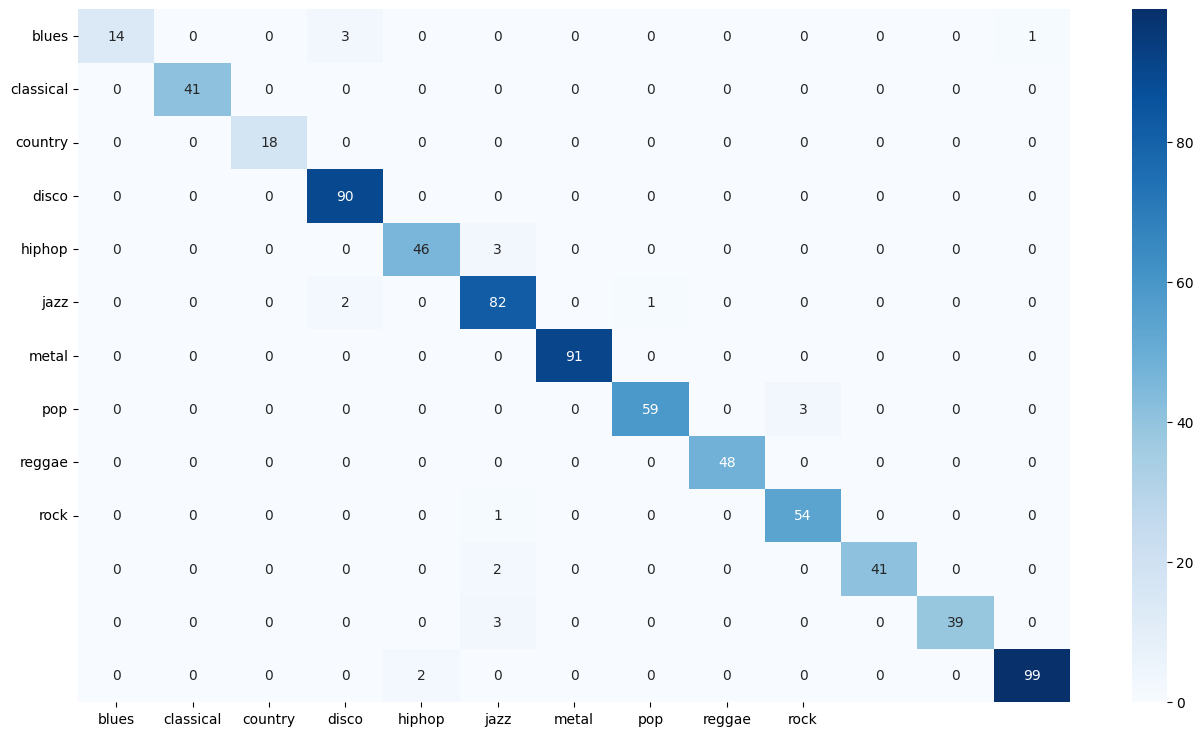

In [ ]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

Recommender System:

In [ ]:
# Libraries
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Read data
data = pd.read_csv('/content/drive/Shareddrives/Machine_Learning_Project_Drive/Audio_Features/all_audio_features_modified.csv', index_col='song_name')

# Extract labels
genres = data[['genre']]

# Drop labels from original dataframe
data = data.drop(columns=['length','genre'])
data.head()

,tempo,sample_rate,zero_crossing_rate_mean,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var
song_name,,,,,,,,,,,,,,,,,,,,,
Bastille - Pompeii (Official Music Video).wav,127.840909,48000,0.051286,0.487268,0.085274,0.085285,0.002241,2871.076438,1.441703e+06,3596.365282,...,-5.858119,76.428375,3.404270,93.981544,3.539105,90.29827,1.299980,93.526060,3.582542,62.812840
The All-American Rejects - It Ends Tonight (Official Music Video).wav,87.890625,48000,0.067646,0.418768,0.080878,0.237232,0.007411,3048.635671,1.128025e+06,3394.308270,...,-0.050243,70.925064,0.873509,62.516384,1.554585,84.04129,-4.084450,85.042046,4.296711,80.412224
Green Day - Basket Case [Official Music Video] (4K Upgrade).wav,175.781250,48000,0.071496,0.520835,0.075708,0.176846,0.005183,3043.054780,1.106475e+06,3360.941989,...,-4.245478,52.792515,4.360476,71.160470,-4.113362,48.31391,4.710874,58.290700,-0.814200,44.786300
Foster The People - Pumped Up Kicks (Official Video).wav,127.840909,48000,0.038031,0.486052,0.080846,0.065983,0.000904,2078.524699,7.686032e+05,2903.595503,...,0.917522,94.850600,1.742605,62.195637,1.413289,72.58222,-0.258201,65.595110,-1.190651,51.773197
Radiohead - Creep.wav,187.500000,48000,0.059744,0.544851,0.076422,0.133708,0.005017,3081.464370,2.418443e+06,3614.179944,...,-0.864149,80.110466,1.557497,96.741180,-2.349292,60.32361,3.886798,67.925950,2.439990,63.868980


In [ ]:
# Scale the data
data_scaled=preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))

Scaled data type: <class 'numpy.ndarray'>


In [ ]:
# Cosine similarity
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(genres.index)
sim_df_names.columns = genres.index

sim_df_names.head()

Similarity shape: (3711, 3711)


song_name,Bastille - Pompeii (Official Music Video).wav,The All-American Rejects - It Ends Tonight (Official Music Video).wav,Green Day - Basket Case [Official Music Video] (4K Upgrade).wav,Foster The People - Pumped Up Kicks (Official Video).wav,Radiohead - Creep.wav,Oasis - Wonderwall (Official Video).wav,Foo Fighters - Everlong (Official HD Video).wav,Imagine Dragons - Radioactive.wav,Red Hot Chili Peppers - Under The Bridge [Video].wav,Imagine Dragons - Demons (Official Music Video).wav,...,Canned Heat - ＂Spoonful＂.wav,The Beatles - I Want To Hold your Hand [HD].wav,Gerry Rafferty - Baker street.wav,Rob Zombie - Dragula.wav,Pixies ：： Where Is My Mind.wav,Billy Ray Cyrus - Achy Breaky Heart with lyrics.wav,The Beatles - Here Comes the Sun (Lyrics).wav,Nickelback - How You Remind Me.wav,Bjørn Berge - Zebra (studio version).wav,Tie Your Mother Down- Queen.wav
song_name,,,,,,,,,,,,,,,,,,,,,
Bastille - Pompeii (Official Music Video).wav,1.000000,0.062659,0.078849,0.289329,0.228354,-0.040511,0.046192,0.369482,0.159432,0.305609,...,0.145719,-0.143898,-0.307628,0.031571,-0.037165,-0.022884,0.055594,0.084534,0.160816,-0.378530
The All-American Rejects - It Ends Tonight (Official Music Video).wav,0.062659,1.000000,0.088362,-0.356435,-0.386236,-0.041644,0.111766,-0.236256,-0.544922,-0.020162,...,0.170760,0.265227,0.083436,0.405085,-0.303014,0.264521,0.209119,0.290602,0.493435,0.275686
Green Day - Basket Case [Official Music Video] (4K Upgrade).wav,0.078849,0.088362,1.000000,-0.044354,0.284154,0.386803,0.799572,0.310556,-0.059403,-0.056242,...,0.175189,0.556537,-0.119745,0.534689,-0.042307,-0.035684,0.228544,0.315692,0.238199,0.015634
Foster The People - Pumped Up Kicks (Official Video).wav,0.289329,-0.356435,-0.044354,1.000000,0.122458,0.217827,0.007836,0.287341,0.424079,0.262759,...,0.110954,-0.138011,-0.010200,-0.338207,0.003084,0.226189,0.170695,0.008319,-0.290900,-0.119979
Radiohead - Creep.wav,0.228354,-0.386236,0.284154,0.122458,1.000000,0.372575,0.326434,0.036414,0.466205,-0.261288,...,-0.276357,-0.186903,-0.227611,-0.083052,0.016414,-0.193649,0.033158,0.043589,-0.079451,-0.362766


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
def find_similar_songs(name):
    # Find songs most similar to another song
    series = sim_df_names[name].sort_values(ascending = False)

    # Remove cosine similarity == 1 (songs will always have the best match with themselves)
    series = series.drop(name)

    name = name.replace('.wav', '')

    # Display the 5 top matches
    print("\n*******\nSimilar songs to ", name)
    series.index = series.index.str.replace('.wav', '')
    print(series.head(5))

In [ ]:
find_similar_songs('Radiohead - Creep.wav')

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [ ]:
find_similar_songs('Foo Fighters - Everlong (Official HD Video).wav')

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'